In [3]:
import pandas as pd

In [4]:
master = pd.read_csv('master_with_neighborhood_for_census.csv')

In [39]:
master['RES_UNITS'].value_counts()

0      101726
1       66382
3        3812
2        2650
4        1029
        ...  
57          1
113         1
716         1
116         1
188         1
Name: RES_UNITS, Length: 149, dtype: int64

In [11]:
master[['OWN_OCC','BLDG_TYPE_INPUT']].value_counts()
keep_types = 

OWN_OCC  BLDG_TYPE                    
Y        CL - Colonial                    14322
N        NoBld -                          11208
         RM - Row Middle                   9980
         99 - Vacant                       8980
         LR - Low Rise                     8634
                                          ...  
         905 - CHARITABLE Organization        1
         943 - COMPUTER /SCIENCE LAB          1
Y        326 - RESTAURANT/Cafeteria           1
         344 - OFFICE 3-9 STORY               1
N        427 - GAS STORAGE                    1
Length: 257, dtype: int64

<AxesSubplot:>

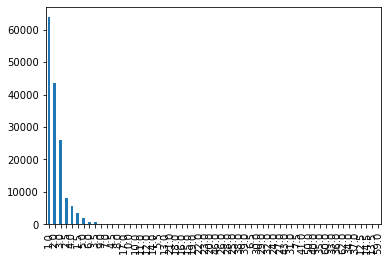

In [27]:
master['RES_FLOOR'].value_counts().plot(kind='bar')

In [23]:
include_list = [i[0] for i in list(zip(master['BLDG_TYPE'].value_counts().keys(),master['BLDG_TYPE'].value_counts())) if i[1] > 10_000]

In [24]:
master['BLDG_TYPE_INPUT'] = master.apply(lambda x : x['BLDG_TYPE'] if x['BLDG_TYPE'] in include_list else 'Other_type',axis = 1)

In [26]:
master['BLDG_TYPE_INPUT']

Other_type            64822
RM - Row Middle       17602
CL - Colonial         16832
LR - Low Rise         14790
DK - Decker           14378
MR - Mid Rise         13830
CV - Conventional     13087
FS - Free Standing    12049
NoBld -               11208
Name: BLDG_TYPE_INPUT, dtype: int64

In [28]:
def limit_for_prediction(df, input_column_name, output_column_name, cut_off,other):
    include_list = [i[0] for i in list(zip(df[input_column_name].value_counts().keys(),df[input_column_name].value_counts())) if i[1] > cut_off]
    df[output_column_name] = master.apply(lambda x : x[input_column_name] if x[input_column_name] in include_list else other,axis = 1)
    
    
    
    
    
    

In [42]:
limit_for_prediction(master, "RES_FLOOR", "RES_FLOOR_INPUT", 10_000,other = 'Other')
limit_for_prediction(master, "RES_UNITS", "RES_UNITS_INPUT", 500,other = 'Other')

In [31]:
master['BLDG_TYPE_INPUT']

0                Other_type
1           RM - Row Middle
2           RM - Row Middle
3           RM - Row Middle
4                Other_type
                ...        
178593           Other_type
178594           Other_type
178595    CV - Conventional
178596           Other_type
178597           Other_type
Name: BLDG_TYPE_INPUT, Length: 178598, dtype: object

In [129]:
bins = [0, 1900, 1925, 1950, 1975, 2025]
master['YR_BUILT_INPUT'] = pd.cut(master['YR_BUILT'], bins)

In [130]:
master['YR_BUILT_INPUT']

0            (0.0, 1900.0]
1         (1900.0, 1925.0]
2         (1900.0, 1925.0]
3            (0.0, 1900.0]
4            (0.0, 1900.0]
                ...       
178593                 NaN
178594                 NaN
178595    (1900.0, 1925.0]
178596    (1925.0, 1950.0]
178597       (0.0, 1900.0]
Name: YR_BUILT_INPUT, Length: 178598, dtype: category
Categories (5, interval[int64, right]): [(0, 1900] < (1900, 1925] < (1925, 1950] < (1950, 1975] < (1975, 2025]]

In [118]:
train_data_all = master[['Is_Affordable_Master','RES_UNITS_INPUT','YR_BUILT_INPUT','BLDG_TYPE_INPUT','OWN_OCC']]

    
train_data_all = train_data_all.apply(pd.to_numeric, errors='coerce').dropna()

In [119]:
train_data_all.dtypes

Is_Affordable_Master        bool
RES_UNITS_INPUT           object
YR_BUILT_INPUT          category
BLDG_TYPE_INPUT           object
OWN_OCC                   object
dtype: object

In [120]:
targets = train_data_all['Is_Affordable_Master']
train_data_all = train_data_all[['RES_UNITS_INPUT','YR_BUILT_INPUT','BLDG_TYPE_INPUT','OWN_OCC']]


In [121]:
train_data_all

,RES_UNITS_INPUT,YR_BUILT_INPUT,BLDG_TYPE_INPUT,OWN_OCC
0,0,"(0.0, 1900.0]",Other_type,Y
1,0,"(1900.0, 1925.0]",RM - Row Middle,Y
2,0,"(1900.0, 1925.0]",RM - Row Middle,N
3,0,"(0.0, 1900.0]",RM - Row Middle,N
4,0,"(0.0, 1900.0]",Other_type,Y
...,...,...,...,...
178593,0,NaN,Other_type,N
178594,0,NaN,Other_type,N
178595,0,"(1900.0, 1925.0]",CV - Conventional,N
178596,0,"(1925.0, 1950.0]",Other_type,N


In [122]:
from sklearn.linear_model import LogisticRegression

In [126]:
clf =  LogisticRegression().fit(train_data_all['BLDG_TYPE_INPUT'], targets)

ValueError: could not convert string to float: 'Other_type'